### 📝 Import Libraries and Set Paths

In this cell, we import the required Python libraries for data manipulation, visualization, and image processing:

- `os`: For working with filesystem paths.
- `pandas`: For data manipulation and analysis.
- `matplotlib.pyplot` and `seaborn`: For plotting and visualizing data.
- `PIL`: For loading and displaying images.
- `glob`: For finding files in directories.

We also define:
- **`DATA_DIR`**: The path to the dataset folder.
- **`TARGET_CLASSES`**: A list containing the target art classes: `'Impressionism'`, `'Cubism'`, and `'Abstract_Exprssionism'`.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from glob import glob

# Set visualization style
sns.set(style="whitegrid")

# Define the path to the dataset
DATA_DIR = '/kaggle/input/wikiart'

# Define the target classes to focus on
TARGET_CLASSES = ['Impressionism', 'Cubism', 'Abstract_Expressionism']

### 🖼️ Load the CSV Files

Here, we load the metadata files `classes.csv` and `wclasses.csv` into pandas DataFrames:
- `classes_df` contains metadata about images, including categories and descriptions.
- `wclasses_df` contains information about styles and artists.

We also display the first few rows of each DataFrame to get a quick look at their contents and understand the available metdata.


In [2]:
# Load classes CSV
classes_df = pd.read_csv(os.path.join(DATA_DIR, 'classes.csv'))
wclasses_df = pd.read_csv(os.path.join(DATA_DIR, 'wclasses.csv'))

# Display the first few rows of each DataFrame
print("Classes CSV Sample:")
print(classes_df.head())

print("\nWClasses CSV Sample:")
print(wclasses_df.head())

Classes CSV Sample:
                                            filename         artist  \
0  Abstract_Expressionism/aaron-siskind_acolman-1...  aaron siskind   
1  Abstract_Expressionism/aaron-siskind_chicago-6...  aaron siskind   
2  Abstract_Expressionism/aaron-siskind_glouceste...  aaron siskind   
3  Abstract_Expressionism/aaron-siskind_jerome-ar...  aaron siskind   
4  Abstract_Expressionism/aaron-siskind_kentucky-...  aaron siskind   

                        genre          description             phash  width  \
0  ['Abstract Expressionism']       acolman-1-1955  bebbeb018a7d80a8   1922   
1  ['Abstract Expressionism']       chicago-6-1961  d7d0781be51fc00e   1382   
2  ['Abstract Expressionism']  gloucester-16a-1944  9f846e5a6c639325   1382   
3  ['Abstract Expressionism']  jerome-arizona-1949  a5d691f85ac5e4d0   1382   
4  ['Abstract Expressionism']      kentucky-4-1951  880df359e6b11db1   1382   

   height  genre_count subset  
0    1382            1  train  
1    1746     

### 📊 List Dataset Categories

In this cell:
- We list all the directories present in the dataset folder to identify the available art categories.
- We then filter the directories to show only the target classes: `Impressionism`, `Cubism`, and `Abstract_Expressionism`.
- This helps us determine if these classes are present in the dataset and confirm their availabiity.


In [3]:
# List directories in the dataset folder
categories = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print(f"Categories found in the dataset: {categories}\n\n")
print(f"Total number of categories: {len(categories)}\n\n")

# List directories for target classes
target_categories = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d)) and d in TARGET_CLASSES]
print(f"Target classes in the dataset: {target_categories}")

Categories found in the dataset: ['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impressionism', 'Art_Nouveau_Modern', 'Realism']


Total number of categories: 27


Target classes in the dataset: ['Impressionism', 'Cubism', 'Abstract_Expressionism']


### 📈 Plot Number of Images by Category

In this cell:
- We count the number of images in each art category folder.
- Then, we create a bar plot using Seaborn to visualize the distribution of images across different categories.
- This gives us an idea of the dataset's composition and the popularity of each art cateory.


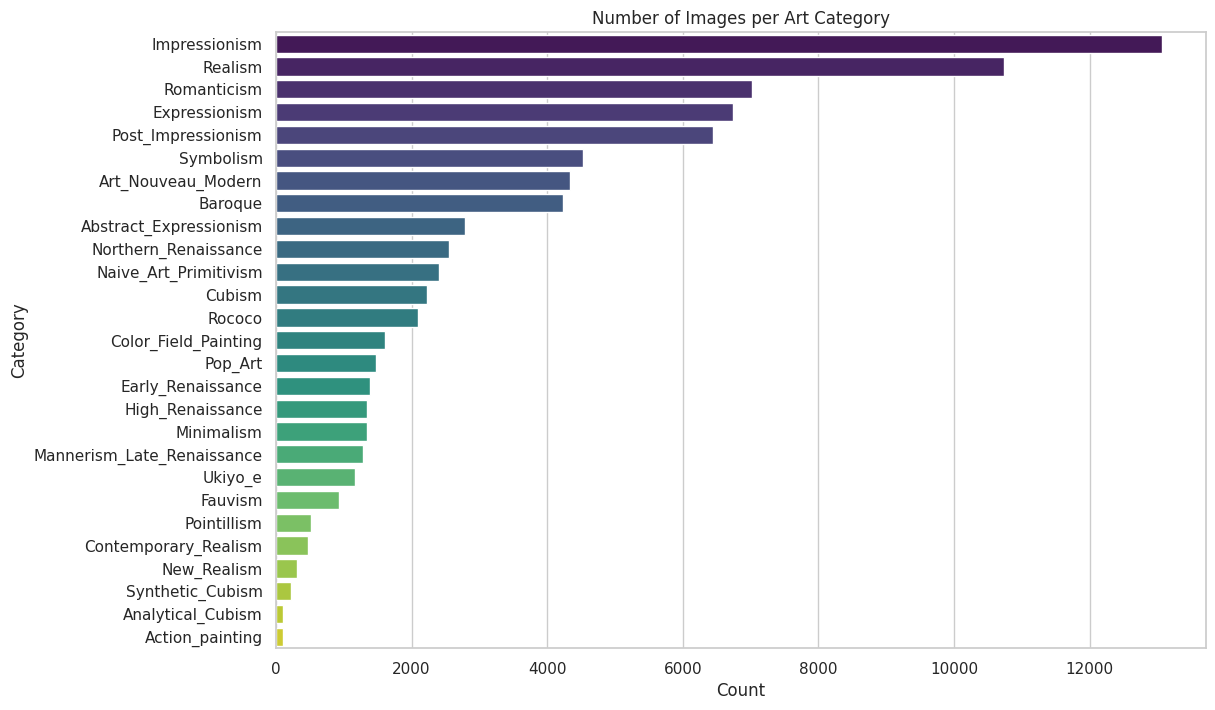

In [4]:
# Count the number of images in each category folder
category_counts = {category: len(glob(os.path.join(DATA_DIR, category, '*.*'))) for category in categories}
category_counts = pd.DataFrame(list(category_counts.items()), columns=["Category", "Count"]).sort_values(by="Count", ascending=False)

# Plot the distribution of classes
plt.figure(figsize=(12, 8))
sns.barplot(x="Count", y="Category", data=category_counts, palette="viridis")
plt.title("Number of Images per Art Category")
plt.show()

### 📊 Plot Number of Images in Target Classes

Here:
- We count the number of images in each of our target classes: `Impressionism`, `Cubism`, and `Abstract_Expressionism`.
- We visualize this count using a bar plot to get a quick comparison of the distribution across these target classes.
- This allows us to see the number of images available in each target class after filteing.


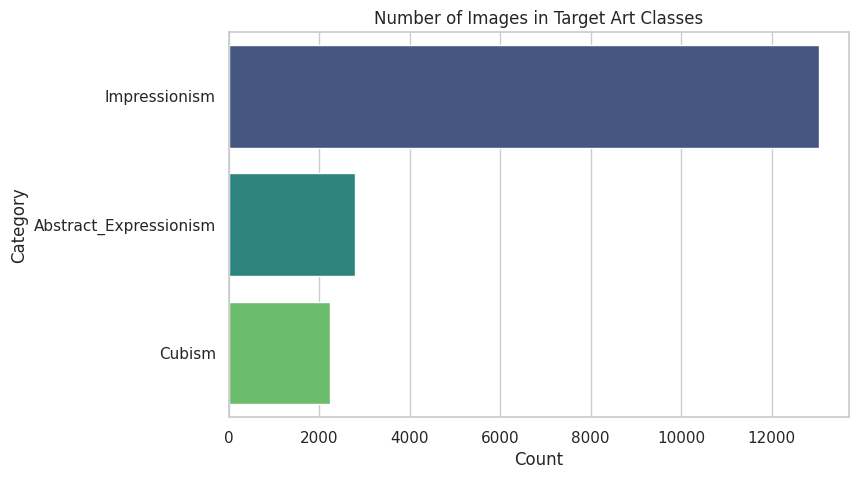

In [5]:
# Count the number of images in each target class folder
category_counts = {category: len(glob(os.path.join(DATA_DIR, category, '*.*'))) for category in TARGET_CLASSES}
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=["Category", "Count"]).sort_values(by="Count", ascending=False)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x="Count", y="Category", data=category_counts_df, palette="viridis")
plt.title("Number of Images in Target Art Classes")
plt.show()

### 🔍 Inspect the Contents of `classes.csv`

In this cell:
- We take a look at the first few rows of the `classes.csv` file to explore the metadata associated with the images.
- The `classes.csv` contains important details such as:
  - **`filename`**: The path to the image file.
  - **`artist`**: The name of the artist.
  - **`genre`**: The art styles and categories (multi-label associations).
  - **`description`**: A textual description of the image ontent.


In [6]:
# Inspect first few rows of classes.csv
print("\nContents of classes.csv:")
print(classes_df.head())


Contents of classes.csv:
                                            filename         artist  \
0  Abstract_Expressionism/aaron-siskind_acolman-1...  aaron siskind   
1  Abstract_Expressionism/aaron-siskind_chicago-6...  aaron siskind   
2  Abstract_Expressionism/aaron-siskind_glouceste...  aaron siskind   
3  Abstract_Expressionism/aaron-siskind_jerome-ar...  aaron siskind   
4  Abstract_Expressionism/aaron-siskind_kentucky-...  aaron siskind   

                        genre          description             phash  width  \
0  ['Abstract Expressionism']       acolman-1-1955  bebbeb018a7d80a8   1922   
1  ['Abstract Expressionism']       chicago-6-1961  d7d0781be51fc00e   1382   
2  ['Abstract Expressionism']  gloucester-16a-1944  9f846e5a6c639325   1382   
3  ['Abstract Expressionism']  jerome-arizona-1949  a5d691f85ac5e4d0   1382   
4  ['Abstract Expressionism']      kentucky-4-1951  880df359e6b11db1   1382   

   height  genre_count subset  
0    1382            1  train  
1    174

### 🔍 Inspect the Contents of `wclasses.csv`

In this cell:
- We view the first few rows of the `wclasses.csv` to examine metadata related to art categories, genres, and styles.
- This file provides additional information that may help in categorizing and understanding the art images beter.


In [7]:
# Inspect first few rows of wclasses.csv
print("\nContents of wclasses.csv:")
print(wclasses_df.head())


Contents of wclasses.csv:
                                                file  artist  genre  style
0  Realism/vincent-van-gogh_pine-trees-in-the-fen...      22    133    161
1  Baroque/rembrandt_the-angel-appearing-to-the-s...      20    136    144
2  Post_Impressionism/paul-cezanne_portrait-of-th...      16    135    160
3  Impressionism/pierre-auguste-renoir_young-girl...      17    131    152
4       Romanticism/ivan-aivazovsky_morning-1851.jpg       9    139    163


### 🕵️‍♂️ Check Missing Values

In this cell:
- We check for any missing values in the `classes.csv` and `wclasses.csv` DataFrames.
- This helps us identify any gaps in the metadata and determine if any cleaning or preprocessing is necessary before analyis.


In [8]:
# Check if there are any missing values
print("\nMissing values in classes.csv:", classes_df.isnull().sum())
print("\nMissing values in wclasses.csv:", wclasses_df.isnull().sum())


Missing values in classes.csv: filename       0
artist         0
genre          0
description    0
phash          0
width          0
height         0
genre_count    0
subset         0
dtype: int64

Missing values in wclasses.csv: file      0
artist    0
genre     0
style     0
dtype: int64


### 📸 Display Sample Images for a Category

In this cell:
- We define the function `plot_sample_images` to display a few sample images for any given category.
- This function loads and plots 5 sample images from the specified category folder.
- It helps us visually inspect the content and style of images in each art cateory.



Category: Impressionism


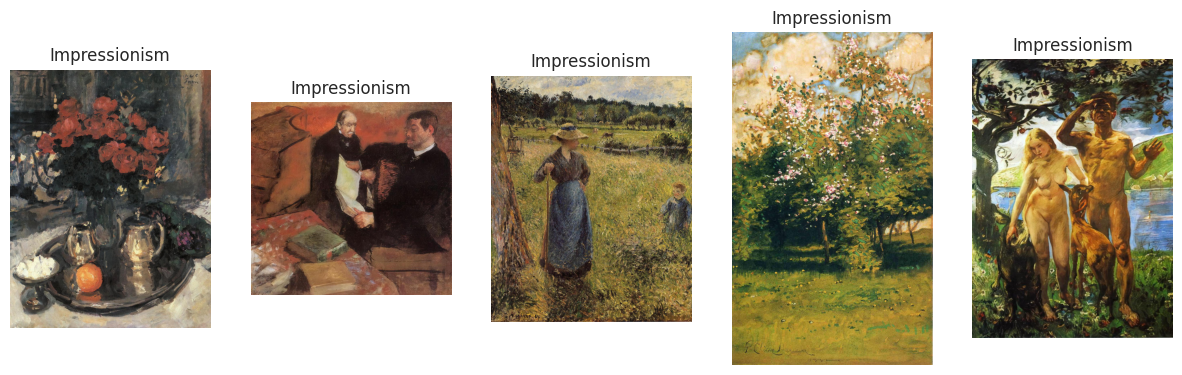


Category: Cubism


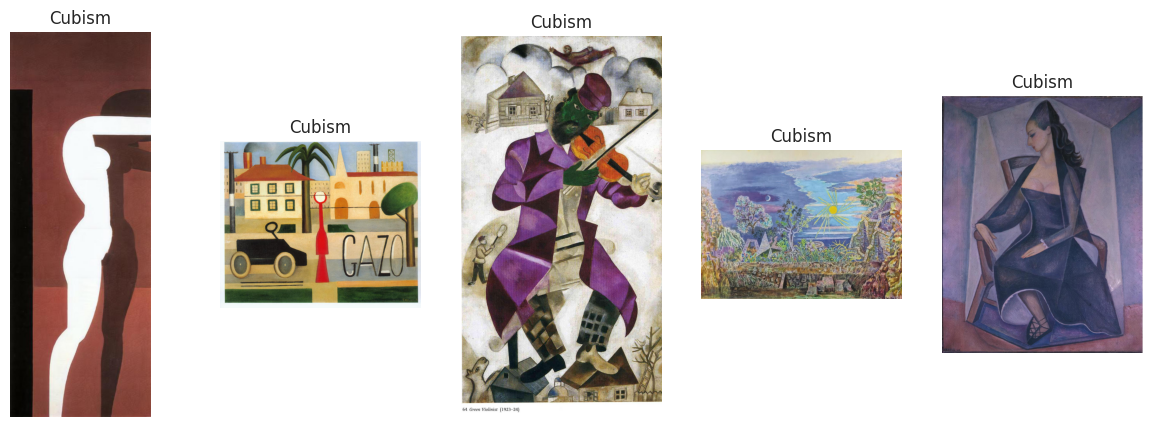


Category: Abstract_Expressionism


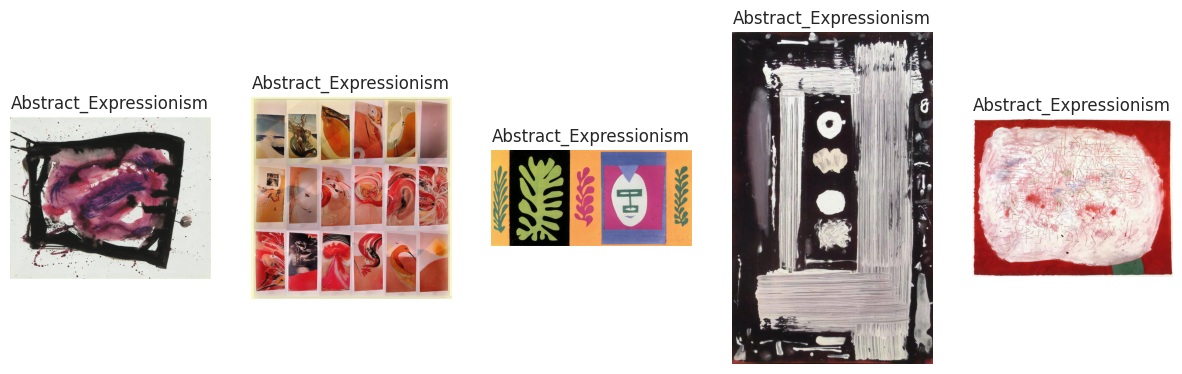

In [9]:
# Function to display sample images for a given category
def plot_sample_images(category, num_samples=5):
    image_paths = glob(os.path.join(DATA_DIR, category, '*.*'))
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        if i < len(image_paths):
            img = Image.open(image_paths[i])
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].title.set_text(category)
        else:
            axes[i].axis('off')

    plt.show()

# Plot sample images for each target class
for category in TARGET_CLASSES:
    print(f"\nCategory: {category}")
    plot_sample_images(category)

### 📉 Filter Metadata for Target Classes

In this cell:
- We filter the metadata in `classes.csv` to include only those images that belong to at least one of the target classes: `Impressionism`, `Cubism`, and `Abstract_Expressionism`.
- This ensures we only work with relevant data and exclude unnecessary categories from our analysis.
- We display the filtered metadata to confirm the images that belong to our target clases.


In [10]:
# Filter metadata to include only target classes
classes_target = classes_df[classes_df['genre'].apply(lambda genres: any(cls in genres for cls in TARGET_CLASSES))]

print("\nFiltered metadata for target classes (classes.csv):")
print(classes_target.head())


Filtered metadata for target classes (classes.csv):
                                               filename         artist  \
1273  Abstract_Expressionism/morris-graves_bird-expe...  morris graves   
2055  Abstract_Expressionism/william-scott_grey-stil...  william scott   
2058  Abstract_Expressionism/william-scott_poem-for-...  william scott   
2059  Abstract_Expressionism/william-scott_reclining...  william scott   
2060  Abstract_Expressionism/william-scott_still-lif...  william scott   

                                                 genre  \
1273  ['Abstract Expressionism', 'Post Impressionism']   
2055  ['Abstract Expressionism', 'Post Impressionism']   
2058  ['Abstract Expressionism', 'Post Impressionism']   
2059  ['Abstract Expressionism', 'Post Impressionism']   
2060  ['Abstract Expressionism', 'Post Impressionism']   

                         description             phash  width  height  \
1273    bird-experiencing-light-1969  a4e92d65e492dad1   1382    1718   
2055   